# MovieLens data analysis

This notebook includes analysis of data from the **MovieLens** dataset, including:

- Data loading and processing
- Analysis of the distribution of ratings
- Visualization of results


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Adjust the display width so that the tables does not separate to parts.


In [23]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)

### Loading data


In [3]:

movies_df = pd.read_csv('../data/ml-latest-small/movies.csv')
print("Movies Dataset:")
print(movies_df.head())

ratings_df = pd.read_csv('../data/ml-latest-small/ratings.csv')
print("\nRatings Dataset:")
print(ratings_df.head())

Movies Dataset:
   movieId                               title                                       genres
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy
2        3             Grumpier Old Men (1995)                               Comedy|Romance
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance
4        5  Father of the Bride Part II (1995)                                       Comedy

Ratings Dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


### Check the main characteristics and structure of each of the data sets.


In [4]:
print("Movies Dataset Info:")
print(movies_df.info())

print("\nRatings Dataset Info:")
print(ratings_df.info())

Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


### Check the main statistics of each of the data sets.


In [5]:
print("Movies Dataset Statistics:")
print(movies_df.describe())

print("\nRatings Dataset Statistics:")
print(ratings_df.describe())

Movies Dataset Statistics:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Ratings Dataset Statistics:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


### Check data sets columns


In [6]:
print("Movies Dataset Columns:")
print(movies_df.columns)

print("\nRatings Dataset Columns:")
print(ratings_df.columns)

Movies Dataset Columns:
Index(['movieId', 'title', 'genres'], dtype='object')

Ratings Dataset Columns:
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


### Checking the number of unique movies and ratings:


### Based on the data overview, the main features of the datasets are as follows:

**movies.csv** contains information about movies, including:

- movieId: A unique identifier for each movie.
- title: The title of the movie.
- genres: The genres of the movie, separated by a pipe (|).

Number of unique movies: 9742.

**ratings.csv** contains user reviews and ratings:

- userId: A unique identifier for each user.
- movieId: The ID of the movie being rated.
- rating: The rating given by the user (from 0 to 5).
- timestamp: The time when the rating was provided.

Number of unique users: 610.


### Distribution of ratings


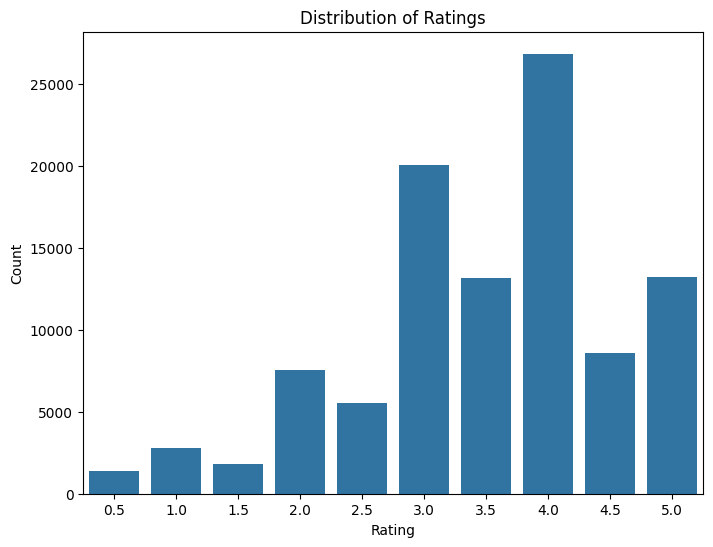

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.savefig('images/distribution_of_ratings.png', bbox_inches='tight')

plt.show()

![Distribution of Ratings](distribution_of_ratings.png)

In [24]:

movie_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()

movie_ratings = movie_ratings.merge(
    movies_df[['movieId', 'title']], on='movieId')

top_rated_movies = movie_ratings.sort_values(
    by='rating', ascending=False).head(50)
print("Top rated movies:")
print(top_rated_movies)

Top rated movies:
      movieId    rating                                              title
9693   187717  5.000000                   Won't You Be My Neighbor? (2018)
4667     6983  5.000000                                   Jane Eyre (1944)
3802     5328  5.000000                                        Rain (2001)
7927    95843  5.000000                             Goodbye Charlie (1964)
2934     3941  5.000000                     Sorority House Massacre (1986)
2933     3940  5.000000                  Slumber Party Massacre III (1990)
2932     3939  5.000000                   Slumber Party Massacre II (1987)
5015     7815  5.000000                                True Stories (1986)
9349   162414  5.000000                                          Moonlight
9347   162344  5.000000                  Tom Segura: Mostly Stories (2016)
9281   158882  5.000000                                   All Yours (2016)
6494    53578  5.000000                    Valet, The (La doublure) (2006)
7948   

### Genre popularity analysis


In [25]:
no_genres_count = movies_df[movies_df['genres'] == '(no genres listed)']
print(f"Number of movies with no genres listed: {no_genres_count}")

movies_df['genres'] = movies_df['genres'].replace(
    '(no genres listed)', 'Unknown')

genre_counts = Counter("|".join(movies_df['genres']).split('|'))
genre_df = pd.DataFrame(genre_counts.items(), columns=[
                        'Genre', 'Count']).sort_values(by='Count', ascending=False)

print("Genre popularity table")
print(genre_df)

Number of movies with no genres listed: Empty DataFrame
Columns: [movieId, title, genres]
Index: []
Genre popularity table
          Genre  Count
6         Drama   4361
3        Comedy   3756
9      Thriller   1894
7        Action   1828
5       Romance   1596
0     Adventure   1263
8         Crime   1199
12       Sci-Fi    980
10       Horror    978
4       Fantasy    779
2      Children    664
1     Animation    611
11      Mystery    573
15  Documentary    440
13          War    382
14      Musical    334
17      Western    167
16         IMAX    158
18    Film-Noir     87
19      Unknown     34


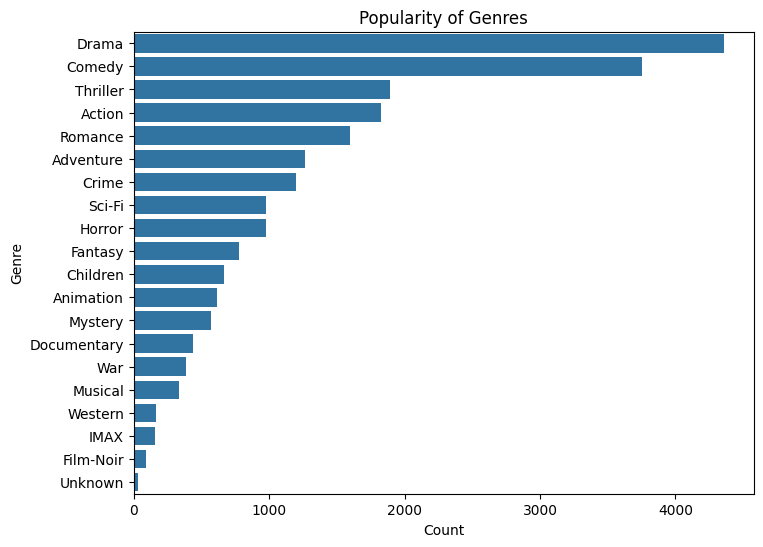

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title('Popularity of Genres')

plt.savefig('images/popularity_of_genres.png', bbox_inches='tight')

plt.show()

![Popularity of genres](popularity_of_genres.png)

### Analysis of movies released by year

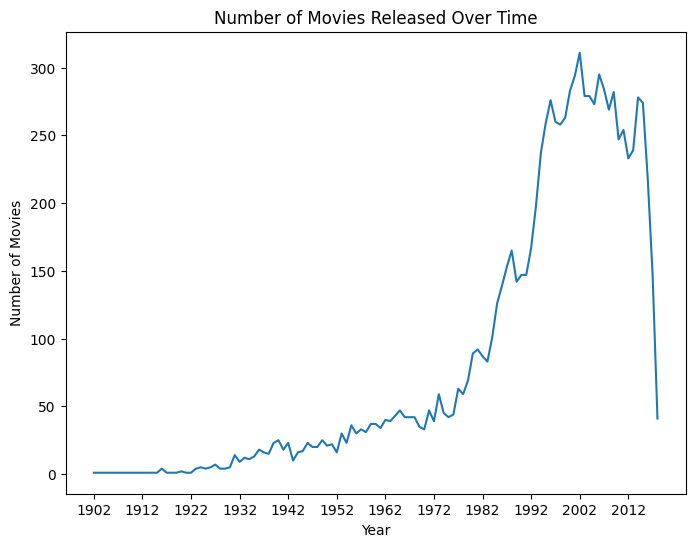

In [69]:
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movie_counts_per_year = movies_df['year'].value_counts().sort_index()

movie_counts_per_year.index = movie_counts_per_year.index.astype(int)

plt.figure(figsize=(8, 6))
sns.lineplot(x=movie_counts_per_year.index, y=movie_counts_per_year.values)
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.xticks(ticks=range(min(movie_counts_per_year.index),
           max(movie_counts_per_year.index) + 1, 10))

plt.savefig('images/movies_per_year.png', bbox_inches='tight')

plt.show()

![Analysis of movies released by year](movies_per_year.png)

### Distribution of grades by genres

In [37]:
movie_ratings = pd.merge(ratings_df, movies_df, on='movieId')
movie_ratings['genres_split'] = movie_ratings['genres'].str.split('|')

genre_ratings = []
for _, row in movie_ratings.iterrows():
    for genre in row['genres_split']:
        genre_ratings.append({'Genre': genre, 'Rating': row['rating']})
genre_ratings_df = pd.DataFrame(genre_ratings)

genre_ratings_df = pd.DataFrame(genre_ratings)

avg_genre_ratings = genre_ratings_df.groupby(
    'Genre')['Rating'].mean().sort_values(ascending=False)

print(avg_genre_ratings)

Genre
Film-Noir      3.920115
War            3.808294
Documentary    3.797785
Crime          3.658294
Drama          3.656184
Mystery        3.632460
Animation      3.629937
IMAX           3.618335
Western        3.583938
Musical        3.563678
Adventure      3.508609
Romance        3.506511
Thriller       3.493706
Fantasy        3.491001
Unknown        3.489362
Sci-Fi         3.455721
Action         3.447984
Children       3.412956
Comedy         3.384721
Horror         3.258195
Name: Rating, dtype: float64


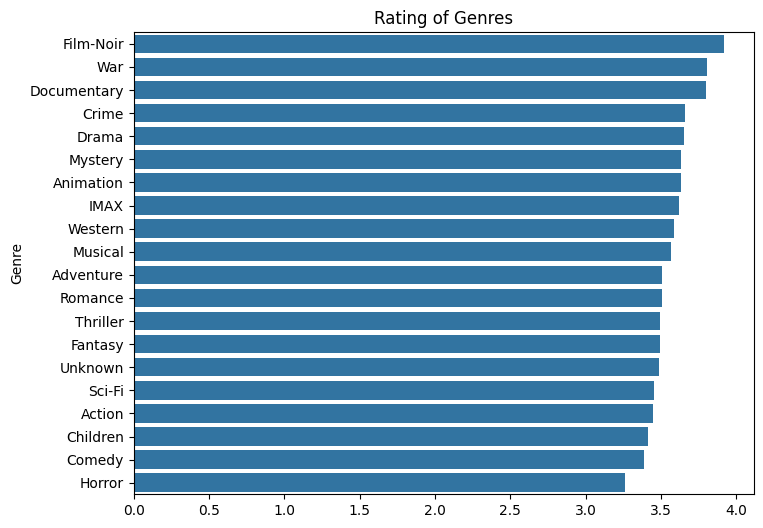

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_genre_ratings.values, y=avg_genre_ratings.index)
plt.title('Rating of Genres')

plt.savefig('images/distribution_of_ grades_by_genres.png', bbox_inches='tight')

plt.show()

![Distribution of grades by genres](distribution_of_%20grades_by_genres.png)